<a href="https://colab.research.google.com/github/ankalagigaurave/ML_SEM_V/blob/master/Labs/ML_Lab_7_J004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Classification using Neural Networks
---



##Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Dataset: fetch_covtype

In [2]:
from sklearn.datasets import fetch_covtype
covtype=fetch_covtype()

In [3]:
covtype

{'DESCR': ".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30×30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like object\nwith the feature matrix in the ``data`` member\nand the target values

In [4]:
x_covtype=covtype.data
y_covtype=covtype.target
X_covtype=pd.DataFrame(x_covtype)
Y_covtype=pd.DataFrame(y_covtype)

In [5]:
print(X_covtype.shape)
print(Y_covtype.shape)

(581012, 54)
(581012, 1)


In [6]:
X_covtype.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [7]:
X_covtype.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
dtype: object

##Plotting correlation heat map for fetch_covtype

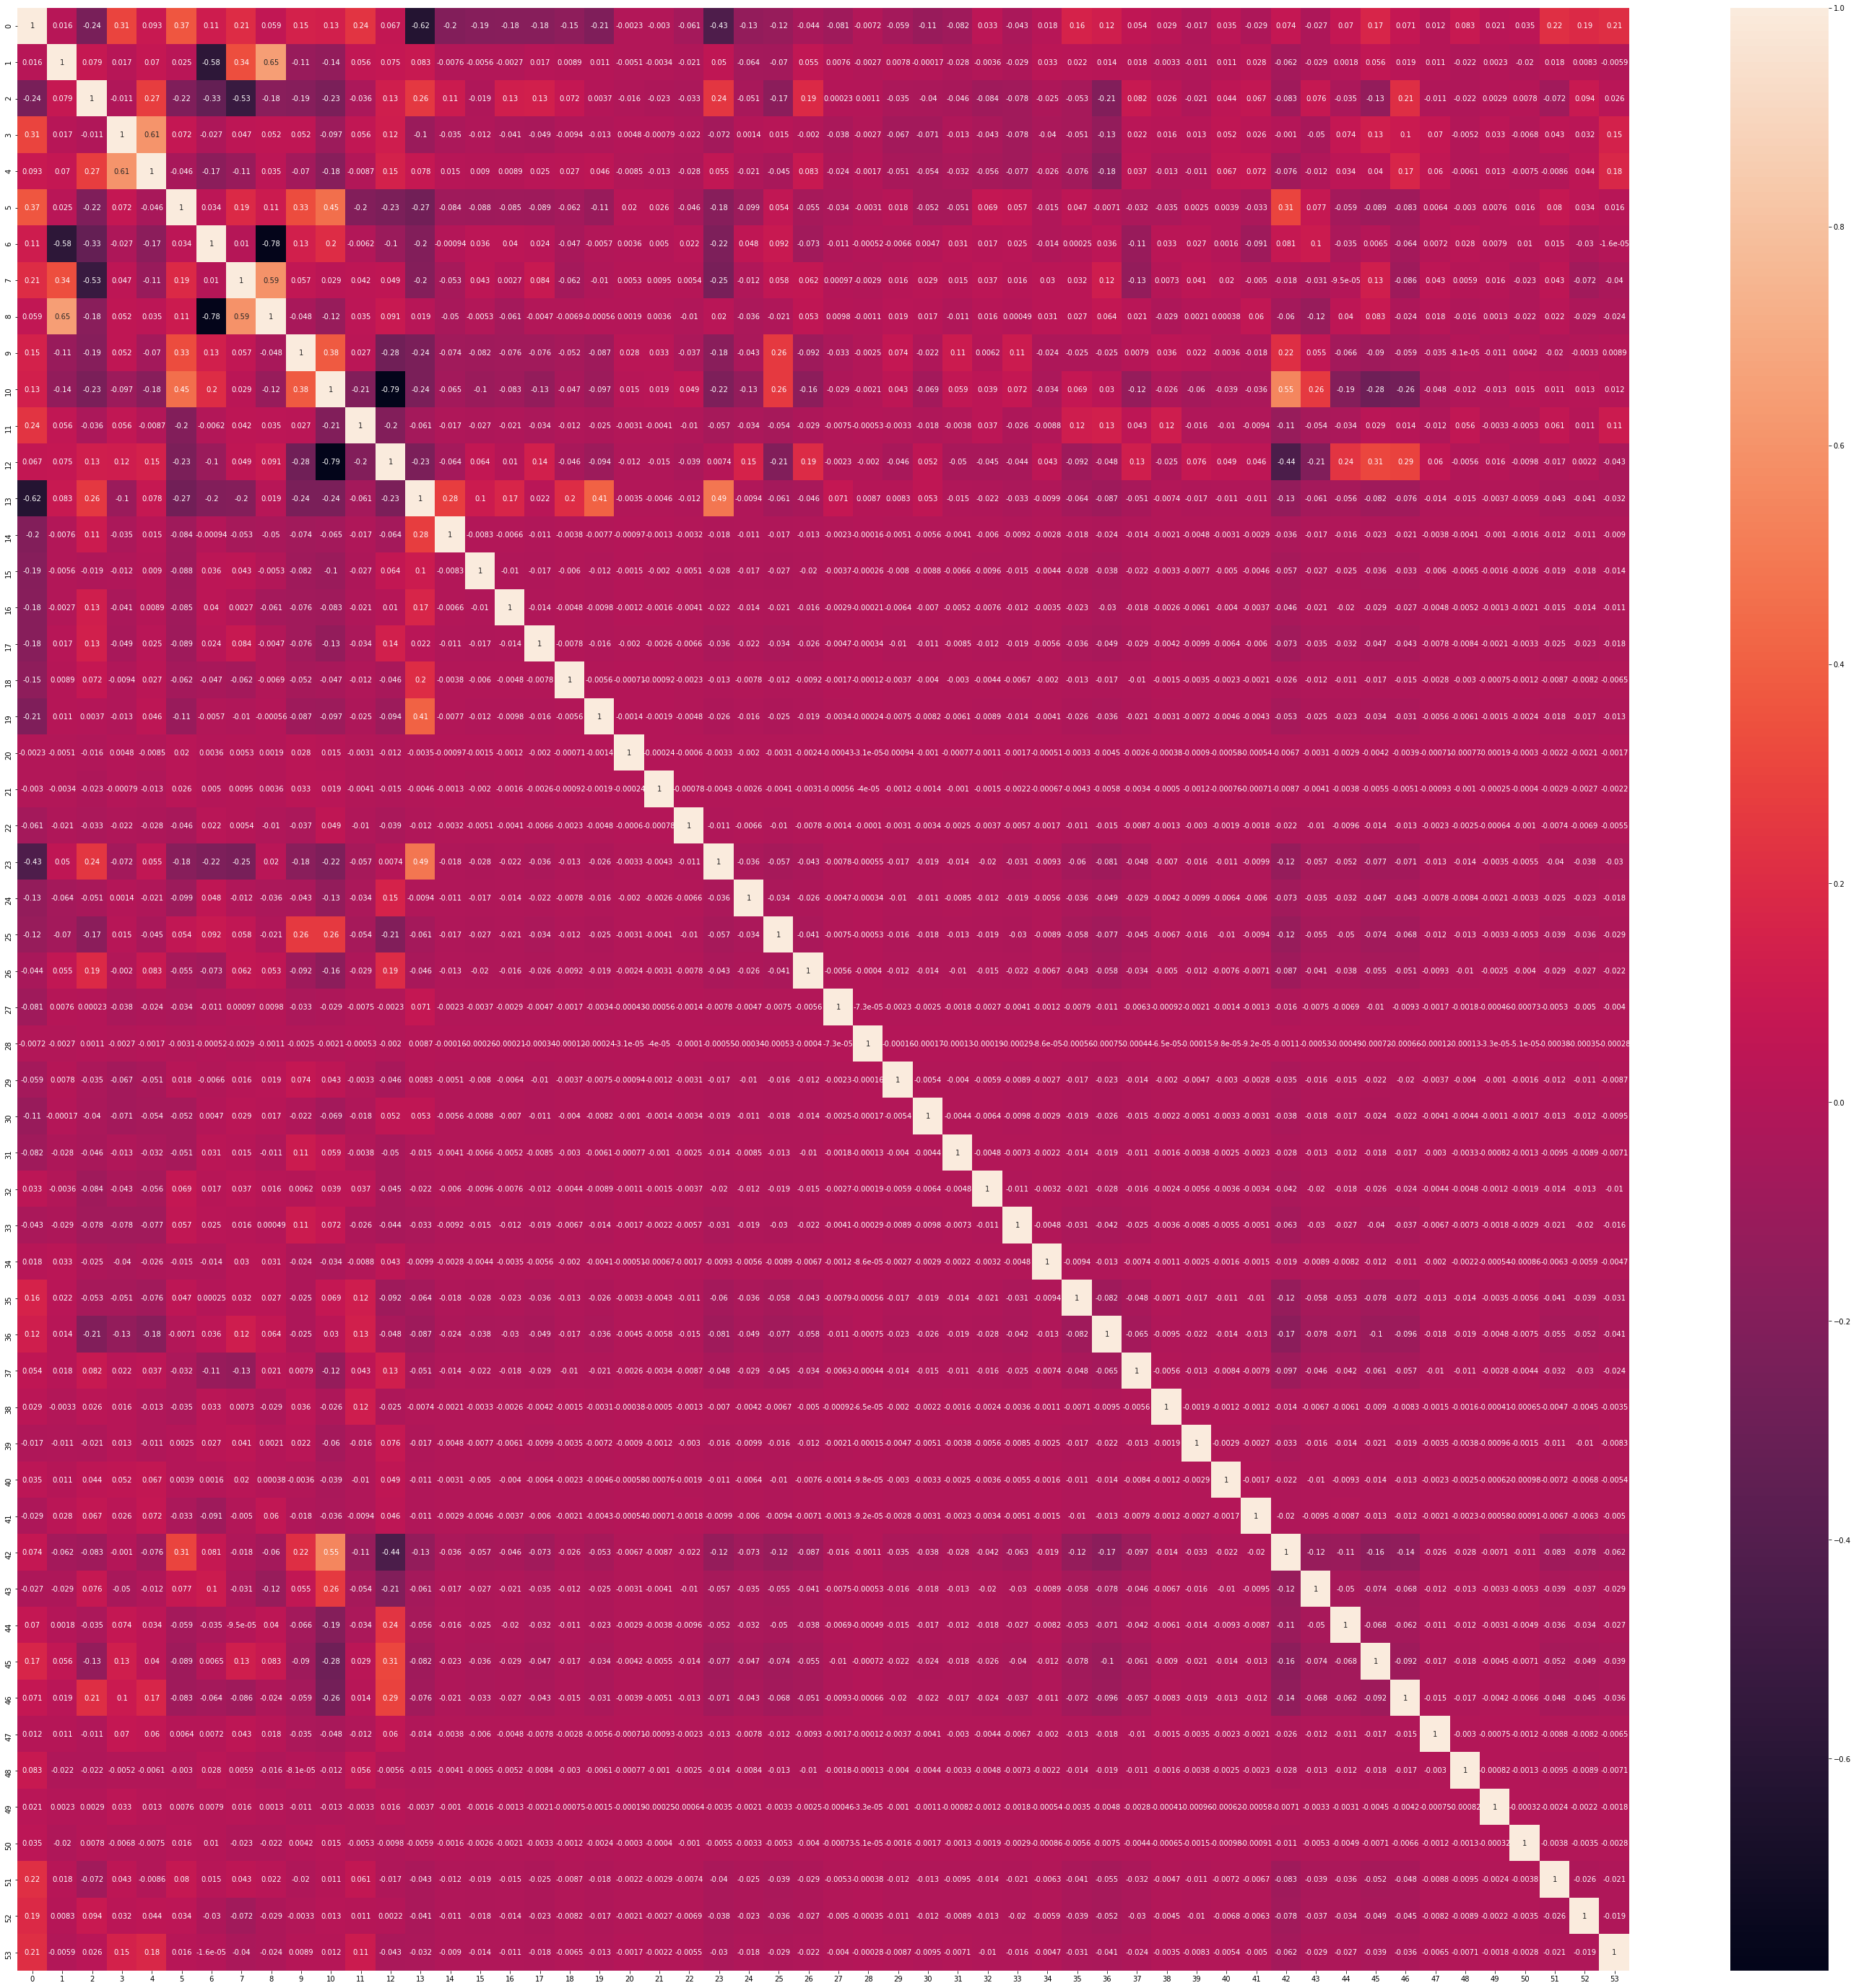

In [8]:
corr_covtype=X_covtype.corr()
fig,axis=plt.subplots(figsize=[50,50])
sns.heatmap(data=corr_covtype,annot=True)
plt.show()

##Building Neural Network for fetch_covtype

In [54]:
Y=Y_covtype.replace([1,2,3,4,5,6,7],[0,1,2,3,4,5,6])
Y=to_categorical(Y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_covtype, Y, test_size=0.2)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(464809, 54)
y_train_shape(464809, 7)
x_test_shape(116203, 54)
y_test_shape(116203, 7)


In [55]:
nn1=models.Sequential([
                       layers.Dense(512,activation='relu',input_dim=54),
                       layers.Dense(256,activation='tanh'),
                       layers.Dense(128,activation='relu'),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(48,activation='tanh'),
                       layers.Dense(24,activation='relu'),
                       layers.Dense(7,activation='softmax')
                       ])

In [56]:
nn1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               28160     
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_55 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_56 (Dense)             (None, 7)                

In [57]:
nn1.compile(optimizer="rmsprop",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [58]:
history_covtype = nn1.fit(x_train,y_train, epochs=5000, batch_size = 5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.49981, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.49981

Epoch 00003: val_accuracy improved from 0.49981 to 0.51392, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.51392 to 0.52420, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.52420 to 0.53057, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.53057 to 0.53810, saving model to best_model.h5

Epoch 00007: val_accuracy did not improve from 0.53810

Epoch 00008: val_accuracy improved from 0.53810 to 0.56017, saving model to best_model.h5

Epoch 00009: val_accuracy improved from 0.56017 to 0.61822, saving model to best_model.h5

Epoch 00010: val_accuracy improved from 0.61822 to 0.62549, saving model to best_model.h5

Epoch 00011: val_accuracy did not improve from 0.62549

Epoch 00012: val_accuracy improved from 0.62549 to 0.62988, saving model to best_model.h5

Epoch 00013: va

In [59]:
saved_model = load_model('best_model.h5')

In [60]:
test_loss, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 0.876


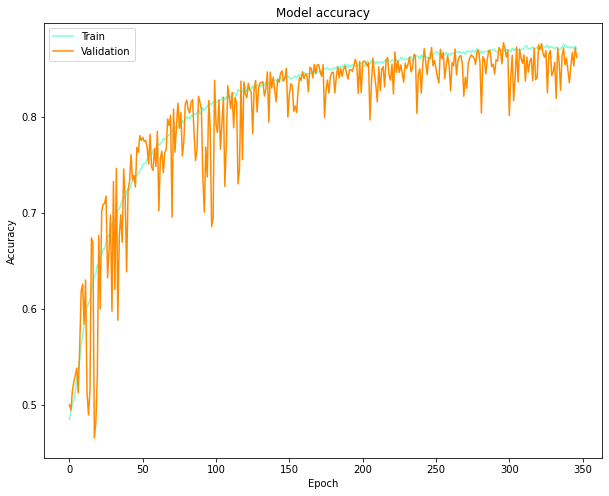

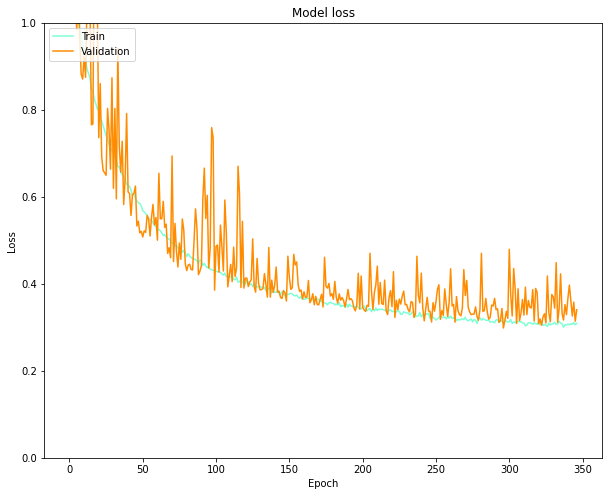

In [61]:
plt.figure(figsize = (10,8))
plt.plot(history_covtype.history['accuracy'], color = 'aquamarine')
plt.plot(history_covtype.history['val_accuracy'], color = 'darkorange')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history_covtype.history['loss'], color = 'aquamarine')
plt.plot(history_covtype.history['val_loss'], color = 'darkorange')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [62]:
from sklearn.datasets import fetch_kddcup99
kddcup99 = fetch_kddcup99()

In [63]:
x_fetch_kddcup99 = kddcup99.data
y_fetch_kddcup99 = kddcup99.target
X_kddcup99 = pd.DataFrame(x_fetch_kddcup99)
Y_kddcup99 = pd.DataFrame(y_fetch_kddcup99)
print(X_kddcup99.shape)
print(Y_kddcup99.shape)

(494021, 41)
(494021, 1)


In [64]:
le = LabelEncoder()
for i in [1,2,3]:
  X_kddcup99[i] = [j.decode('utf-8') for j in X_kddcup99[i]]
  X_kddcup99[i] = le.fit_transform(X_kddcup99[i])

for i in range(X_kddcup99.shape[1]):
  X_kddcup99[i] = X_kddcup99[i].astype('float')

In [65]:
Y = [i.decode('utf-8') for i in y_fetch_kddcup99]
Y = pd.DataFrame(le.fit_transform(Y))

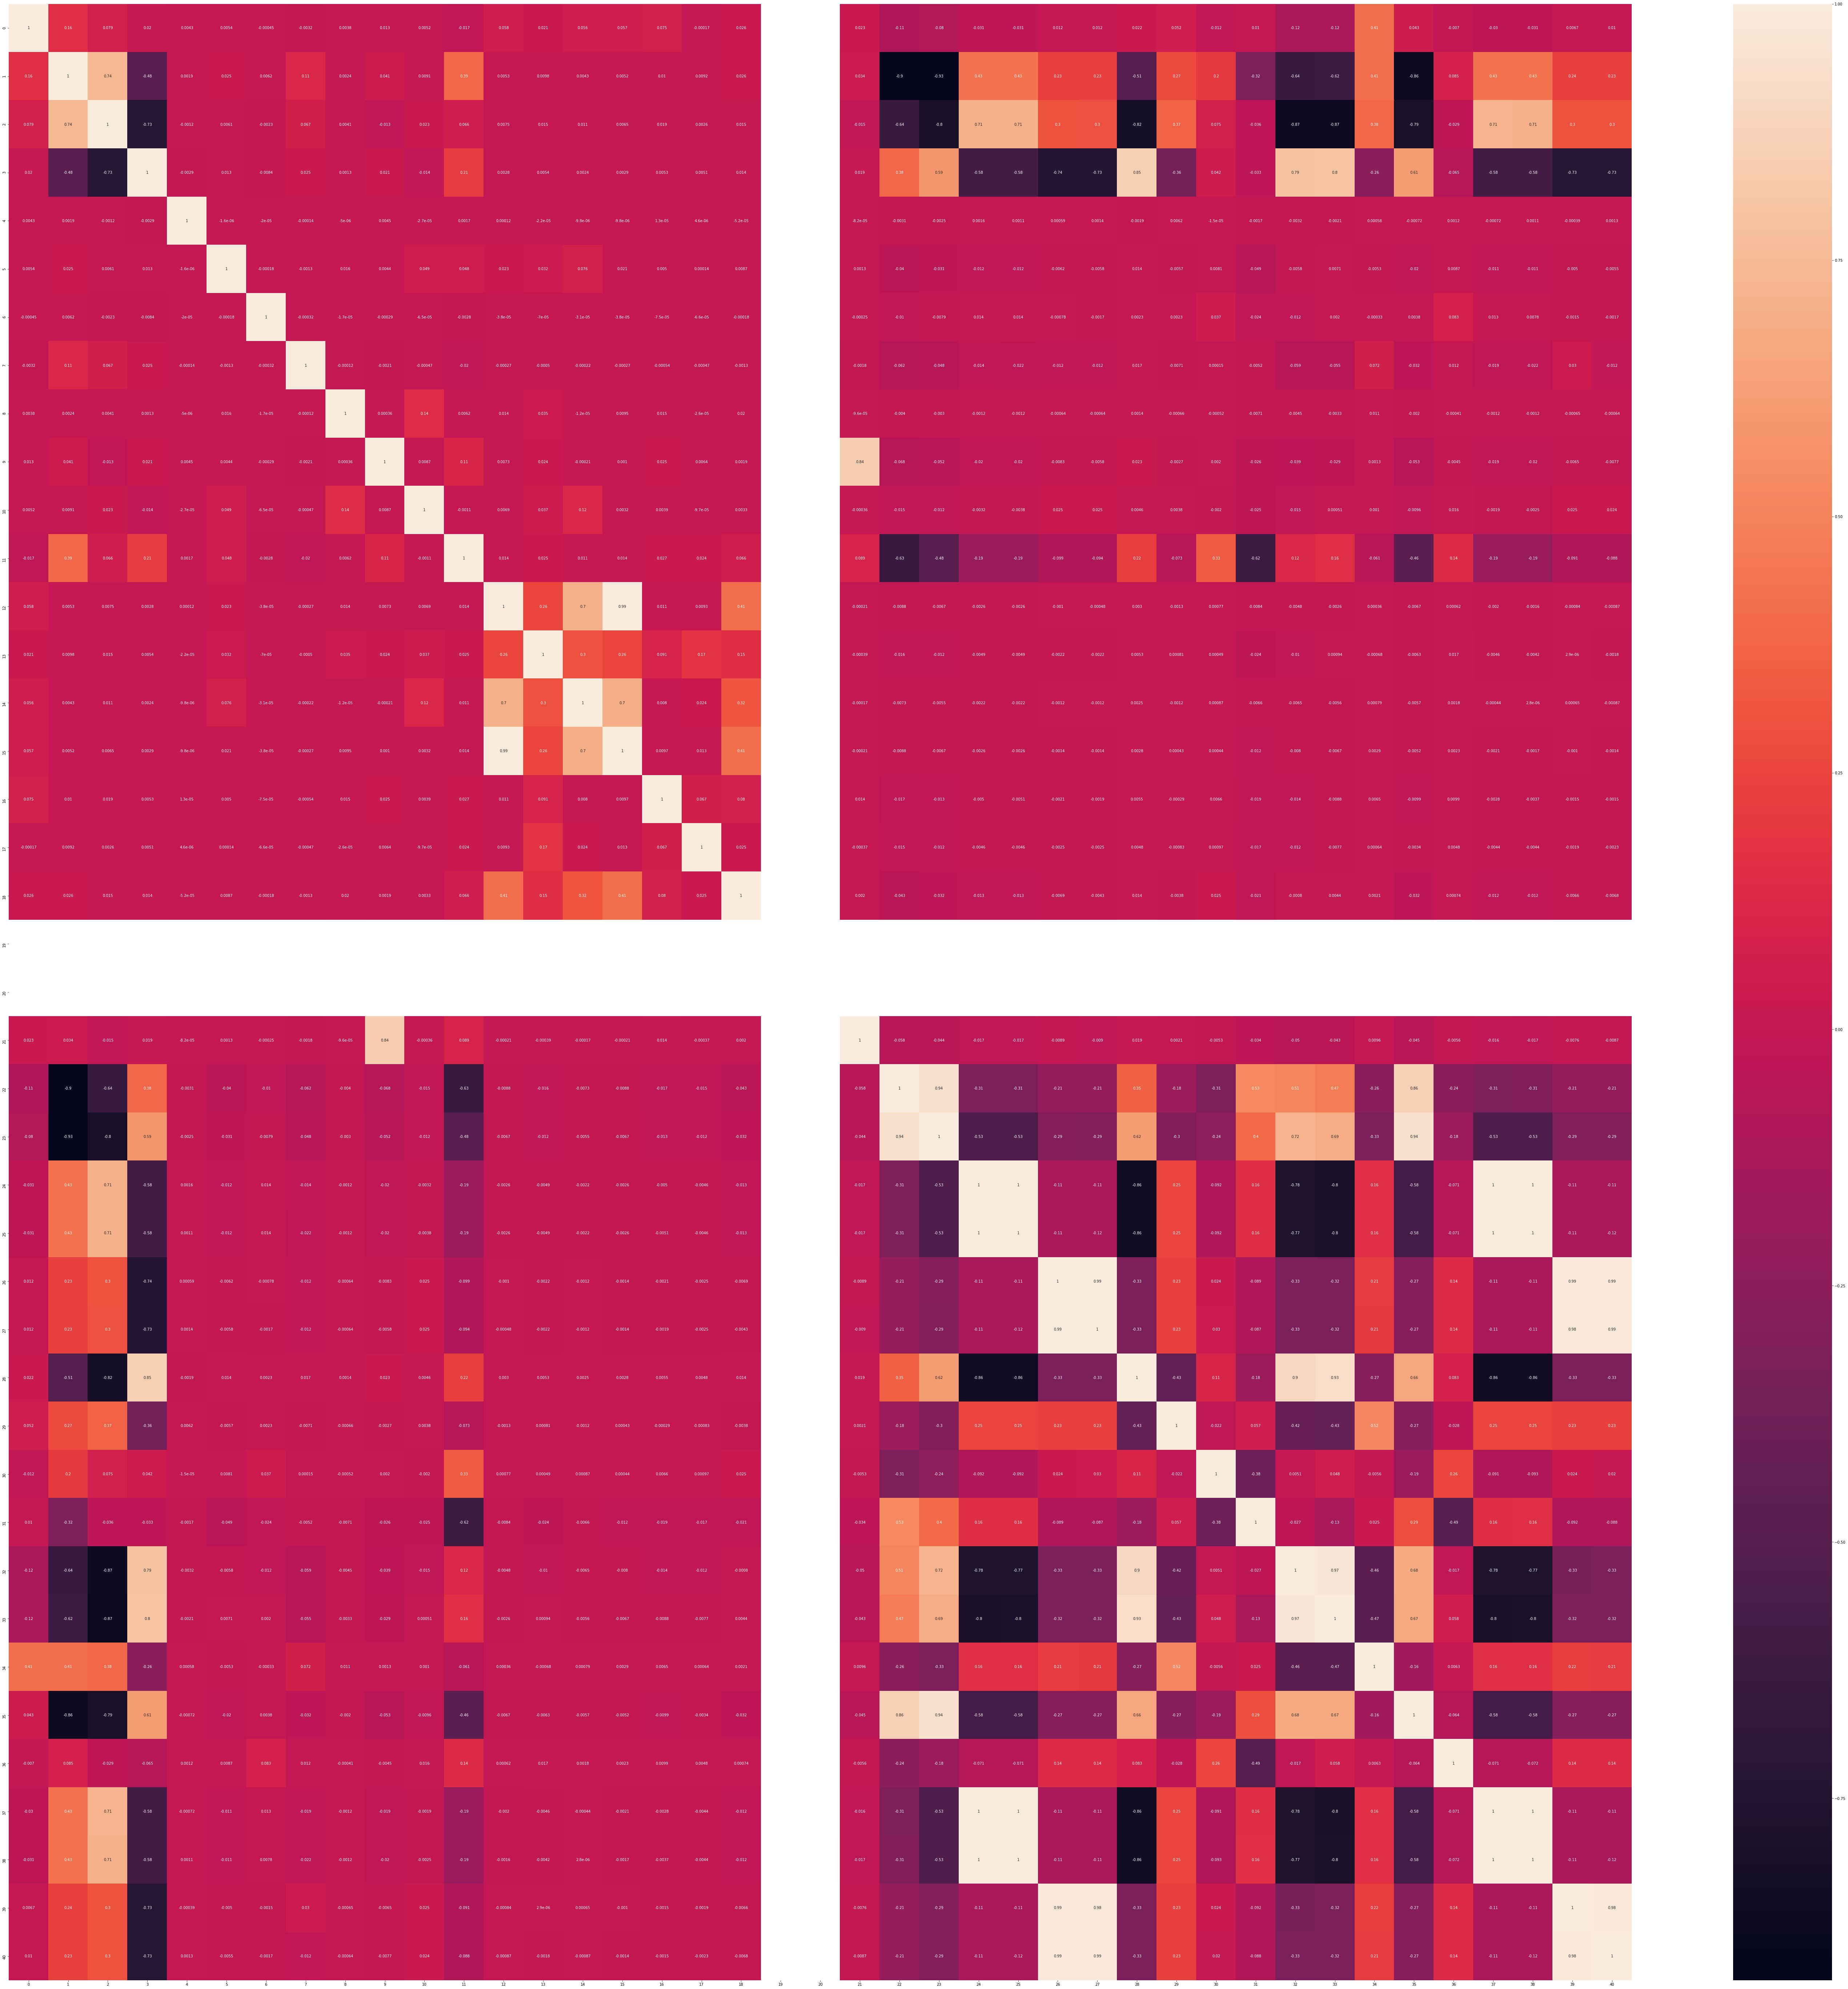

In [67]:
corr_kddcup99 = X_kddcup99.corr()
fig, ax = plt.subplots(figsize = [100,100])
sns.heatmap(data = corr_kddcup99, annot=True)
plt.show()

In [68]:
Y = to_categorical(Y)
x_train, x_test, y_train, y_test = train_test_split(X_kddcup99, Y, test_size=0.20)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(395216, 41)
y_train_shape(395216, 23)
x_test_shape(98805, 41)
y_test_shape(98805, 23)


In [69]:
nn2=models.Sequential([
                       layers.Dense(512,activation='relu',input_dim=41),
                       layers.Dense(256,activation='tanh'),
                       layers.Dense(128,activation='relu'),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(23,activation='softmax')
])

In [70]:
nn2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               21504     
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_60 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_61 (Dense)             (None, 23)                1495      
Total params: 195,479
Trainable params: 195,479
Non-trainable params: 0
_________________________________________________________________


In [71]:
nn2.compile(optimizer="rmsprop",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [72]:
history_kddcup99 = nn2.fit(x_train,y_train, epochs=500, batch_size = 5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.98801, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.98801

Epoch 00003: val_accuracy improved from 0.98801 to 0.98978, saving model to best_model.h5

Epoch 00004: val_accuracy did not improve from 0.98978

Epoch 00005: val_accuracy did not improve from 0.98978

Epoch 00006: val_accuracy did not improve from 0.98978

Epoch 00007: val_accuracy improved from 0.98978 to 0.99160, saving model to best_model.h5

Epoch 00008: val_accuracy improved from 0.99160 to 0.99251, saving model to best_model.h5

Epoch 00009: val_accuracy did not improve from 0.99251

Epoch 00010: val_accuracy did not improve from 0.99251

Epoch 00011: val_accuracy did not improve from 0.99251

Epoch 00012: val_accuracy did not improve from 0.99251

Epoch 00013: val_accuracy improved from 0.99251 to 0.99706, saving model to best_model.h5

Epoch 00014: val_accuracy did not improve from 0.99706

Epoch 00015: val_accuracy did not improve f

In [73]:
saved_model = load_model('best_model.h5')
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 0.999


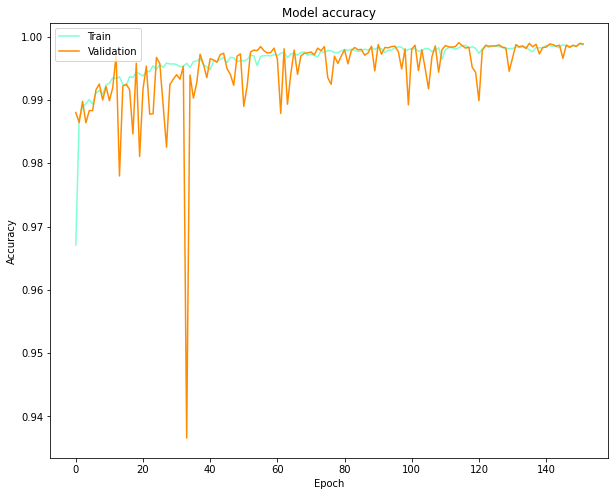

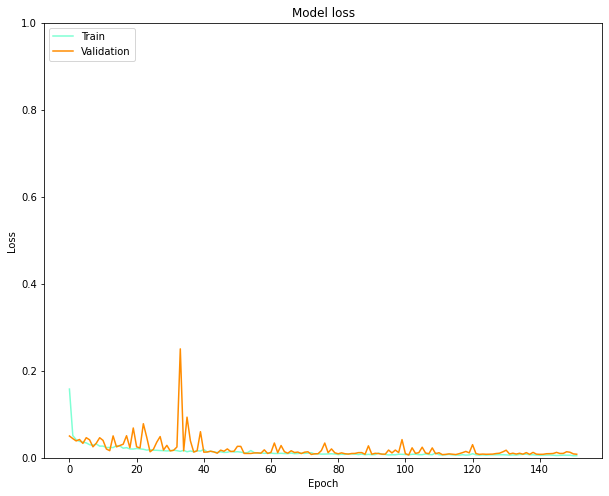

In [74]:
plt.figure(figsize = (10,8))
plt.plot(history_kddcup99.history['accuracy'], color = 'aquamarine')
plt.plot(history_kddcup99.history['val_accuracy'], color = 'darkorange')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history_kddcup99.history['loss'], color = 'aquamarine')
plt.plot(history_kddcup99.history['val_loss'], color = 'darkorange')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = cancer.data
Y_cancer = cancer.target
X_cancer= pd.DataFrame(X_cancer)
Y = pd.DataFrame(Y_cancer)
print(X_cancer.shape)
print(Y.shape)


(569, 30)
(569, 1)


In [18]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X_cancer))


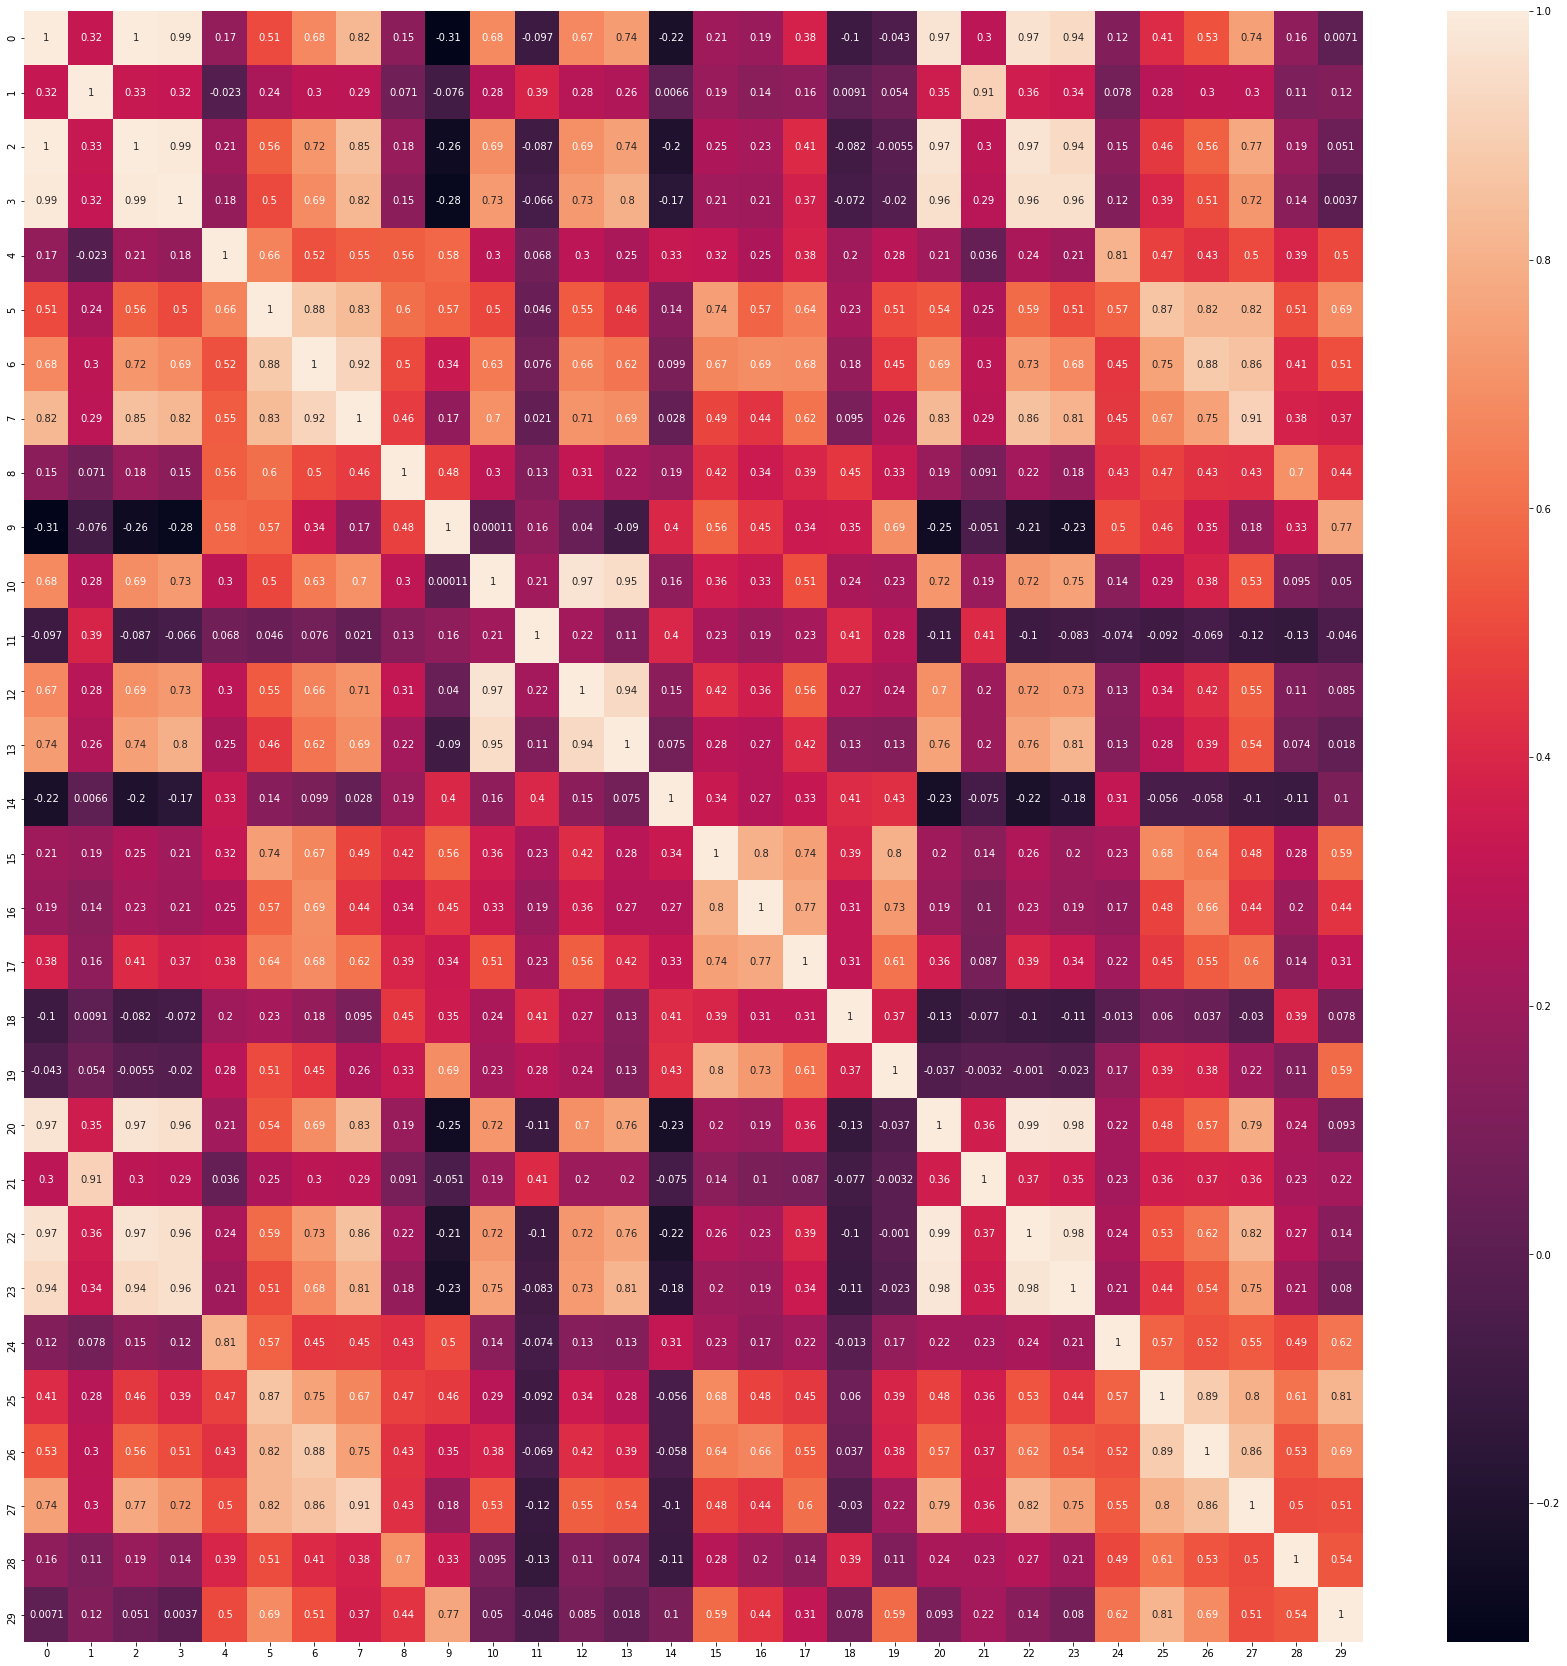

In [19]:
corr_cancer = X.corr()
fig, ax = plt.subplots(figsize = [30,30])
sns.heatmap(data = corr_cancer, annot=True)
plt.show()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(540, 30)
y_train_shape(540, 1)
x_test_shape(29, 30)
y_test_shape(29, 1)


In [31]:
nn3=models.Sequential([
                       layers.Dense(512,activation='relu',input_dim=30),
                       layers.Dense(256,activation='tanh'),
                       layers.Dense(128,activation='relu'),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(48,activation='tanh'),
                       layers.Dense(1,activation='sigmoid')
])

In [32]:
nn3.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               15872     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 49        
Total params: 191,521
Trainable params: 191,521
Non-trainable params: 0
________________________________________________

In [33]:
nn3.compile(optimizer="rmsprop",
           loss='binary_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [34]:
history_cancer = nn3.fit(x_train,y_train, epochs=5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.92593, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.92593 to 1.00000, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 1.00000

Epoch 00004: val_accuracy did not improve from 1.00000

Epoch 00005: val_accuracy did not improve from 1.00000

Epoch 00006: val_accuracy did not improve from 1.00000

Epoch 00007: val_accuracy did not improve from 1.00000

Epoch 00008: val_accuracy did not improve from 1.00000

Epoch 00009: val_accuracy did not improve from 1.00000

Epoch 00010: val_accuracy did not improve from 1.00000

Epoch 00011: val_accuracy did not improve from 1.00000

Epoch 00012: val_accuracy did not improve from 1.00000

Epoch 00013: val_accuracy did not improve from 1.00000

Epoch 00014: val_accuracy did not improve from 1.00000

Epoch 00015: val_accuracy did not improve from 1.00000

Epoch 00016: val_accuracy did not improve from 1.00000

Epoch 00017: val_accuracy did not im

In [35]:
saved_model = load_model('best_model.h5')
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 1.000


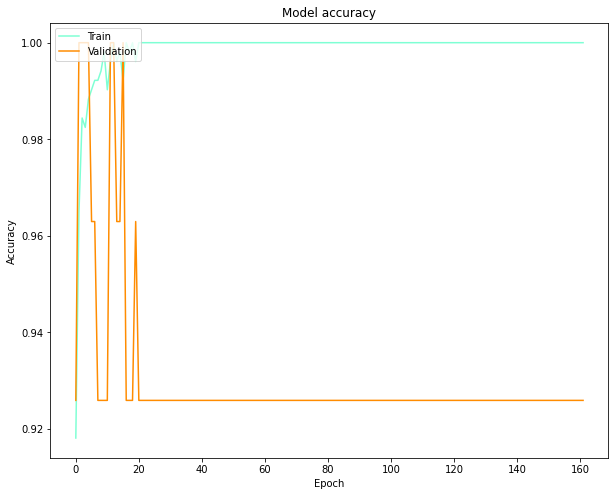

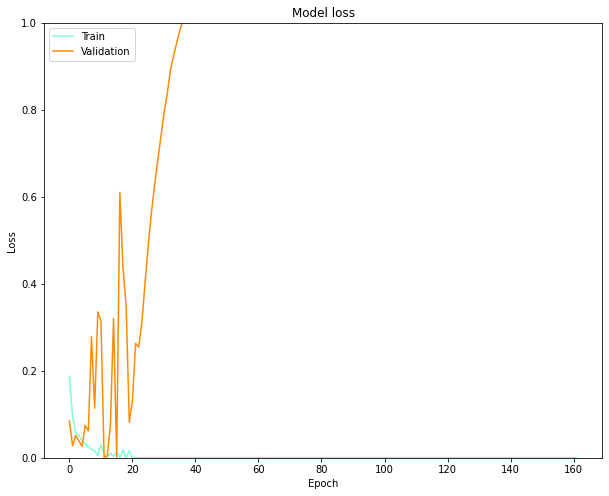

In [36]:
plt.figure(figsize = (10,8))
plt.plot(history_cancer.history['accuracy'], color = 'aquamarine')
plt.plot(history_cancer.history['val_accuracy'], color = 'darkorange')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history_cancer.history['loss'], color = 'aquamarine')
plt.plot(history_cancer.history['val_loss'], color = 'darkorange')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
from sklearn.datasets import load_wine
wine = load_wine()

In [38]:
X = wine.data
Y = wine.target
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print(X.shape)
print(Y.shape)

(178, 13)
(178, 1)


In [39]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

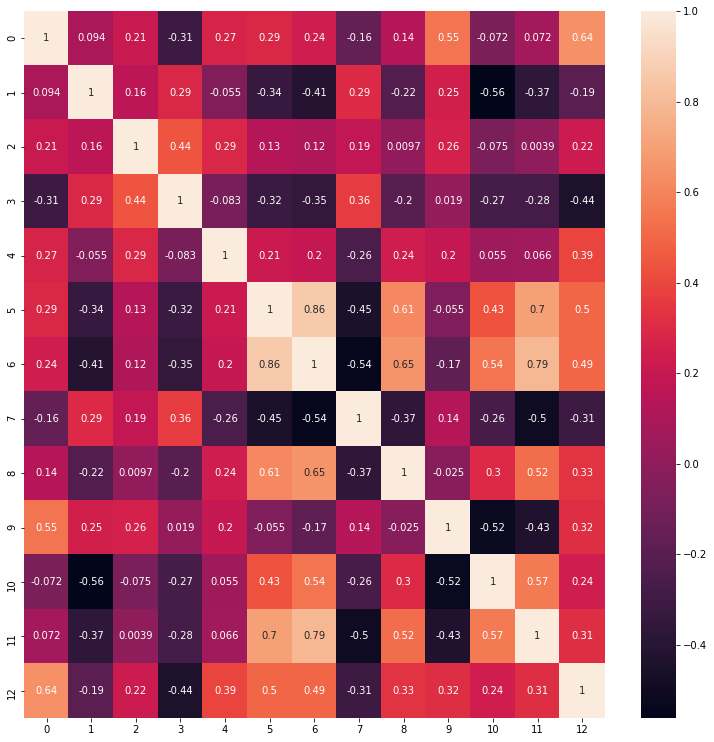

In [40]:
corr_wine = X.corr()
fig, ax = plt.subplots(figsize = [13,13])
sns.heatmap(data = corr_wine, annot=True)
plt.show()

In [41]:
Y = to_categorical(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(142, 13)
y_train_shape(142, 3)
x_test_shape(36, 13)
y_test_shape(36, 3)


In [42]:
nn4=models.Sequential([
                       layers.Dense(512,activation='relu',input_dim=13),
                       layers.Dense(256,activation='tanh'),
                       layers.Dense(128,activation='relu'),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(48,activation='tanh'),
                       layers.Dense(24,activation='relu'),
                       layers.Dense(3,activation='softmax')
])

In [43]:
nn4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               7168      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_34 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_35 (Dense)             (None, 3)                

In [44]:
nn4.compile(optimizer="rmsprop",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [45]:
history_wine = nn4.fit(x_train,y_train, epochs=2000, batch_size = 1000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.87500, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.87500 to 1.00000, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 1.00000

Epoch 00004: val_accuracy did not improve from 1.00000

Epoch 00005: val_accuracy did not improve from 1.00000

Epoch 00006: val_accuracy did not improve from 1.00000

Epoch 00007: val_accuracy did not improve from 1.00000

Epoch 00008: val_accuracy did not improve from 1.00000

Epoch 00009: val_accuracy did not improve from 1.00000

Epoch 00010: val_accuracy did not improve from 1.00000

Epoch 00011: val_accuracy did not improve from 1.00000

Epoch 00012: val_accuracy did not improve from 1.00000

Epoch 00013: val_accuracy did not improve from 1.00000

Epoch 00014: val_accuracy did not improve from 1.00000

Epoch 00015: val_accuracy did not improve from 1.00000

Epoch 00016: val_accuracy did not improve from 1.00000

Epoch 00017: val_accuracy did not im

In [47]:
saved_model = load_model('best_model.h5')
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 1.000


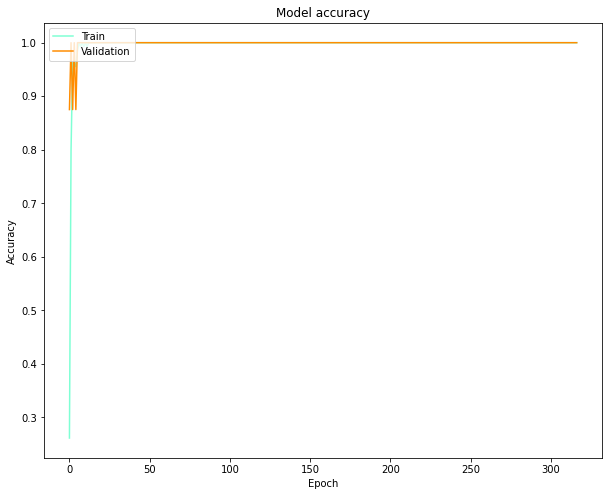

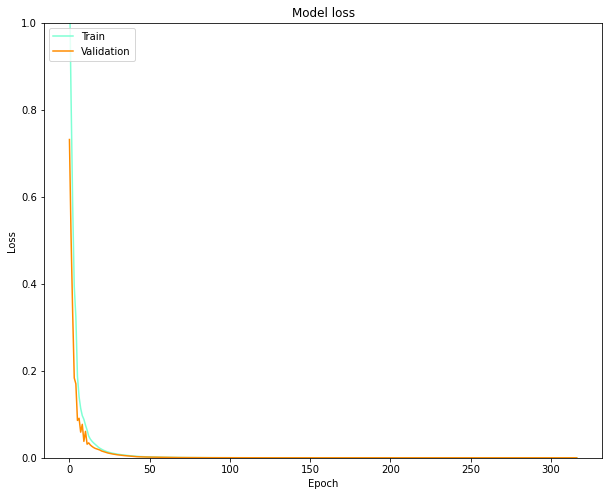

In [48]:
plt.figure(figsize = (10,8))
plt.plot(history_wine.history['accuracy'], color = 'aquamarine')
plt.plot(history_wine.history['val_accuracy'], color = 'darkorange')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history_wine.history['loss'], color = 'aquamarine')
plt.plot(history_wine.history['val_loss'], color = 'darkorange')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()